# Predicción de COVID-19 en el Perú | COVID-19 Prediction in Peru
Por/by: Ricardo Manuel Lazo Vásquez

## Common imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy as cp

## Setup functions

In [2]:
#where to save images
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "COVID_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def clear_plt_cache():
    plt.clf()


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Get the data

In [3]:
url = "https://raw.githubusercontent.com/jmcastagnetto/covid-19-peru-data/master/datos/covid-19-peru-data.csv"
df = pd.read_csv(url)

df.head()

,country,iso3c,region,date,confirmed,deaths,recovered,negative_cases,pcr_positivo,prueba_rapida_positivo,pcr_prapida_positivo
0,Peru,PER,NaN,2020-03-06,1,NaN,NaN,154.0,NaN,NaN,NaN
1,Peru,PER,NaN,2020-03-07,6,NaN,NaN,213.0,NaN,NaN,NaN
2,Peru,PER,NaN,2020-03-09,9,NaN,NaN,309.0,NaN,NaN,NaN
3,Peru,PER,NaN,2020-03-10,11,NaN,NaN,335.0,NaN,NaN,NaN
4,Peru,PER,NaN,2020-03-11,17,NaN,NaN,697.0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 1579 non-null   object 
 1   iso3c                   1579 non-null   object 
 2   region                  1503 non-null   object 
 3   date                    1579 non-null   object 
 4   confirmed               1579 non-null   int64  
 5   deaths                  990 non-null    float64
 6   recovered               94 non-null     float64
 7   negative_cases          76 non-null     float64
 8   pcr_positivo            1089 non-null   float64
 9   prueba_rapida_positivo  1026 non-null   float64
 10  pcr_prapida_positivo    24 non-null     float64
dtypes: float64(6), int64(1), object(4)
memory usage: 135.8+ KB


In [5]:
df.describe()

,confirmed,deaths,recovered,negative_cases,pcr_positivo,prueba_rapida_positivo,pcr_prapida_positivo
count,1579.000000,990.000000,94.000000,76.000000,1089.000000,1026.000000,24.000000
mean,2436.980367,107.477778,6747.074468,170498.052632,1216.835629,2305.487329,34.583333
std,10392.008287,333.924843,10371.029287,196737.660050,4065.579359,8569.691001,72.926358
min,1.000000,1.000000,1.000000,154.000000,1.000000,1.000000,1.000000
25%,18.500000,2.000000,6.500000,8369.250000,17.000000,64.250000,1.750000
50%,141.000000,7.000000,951.500000,84647.500000,75.000000,179.000000,3.000000
75%,574.500000,59.750000,8990.500000,317094.500000,294.000000,652.250000,6.250000
max,108769.000000,3148.000000,43587.000000,627731.000000,30351.000000,78418.000000,231.000000


### Histogram Problem
* Not so necessary because we have different values everyday.

Saving figure attribute_histogram_plots


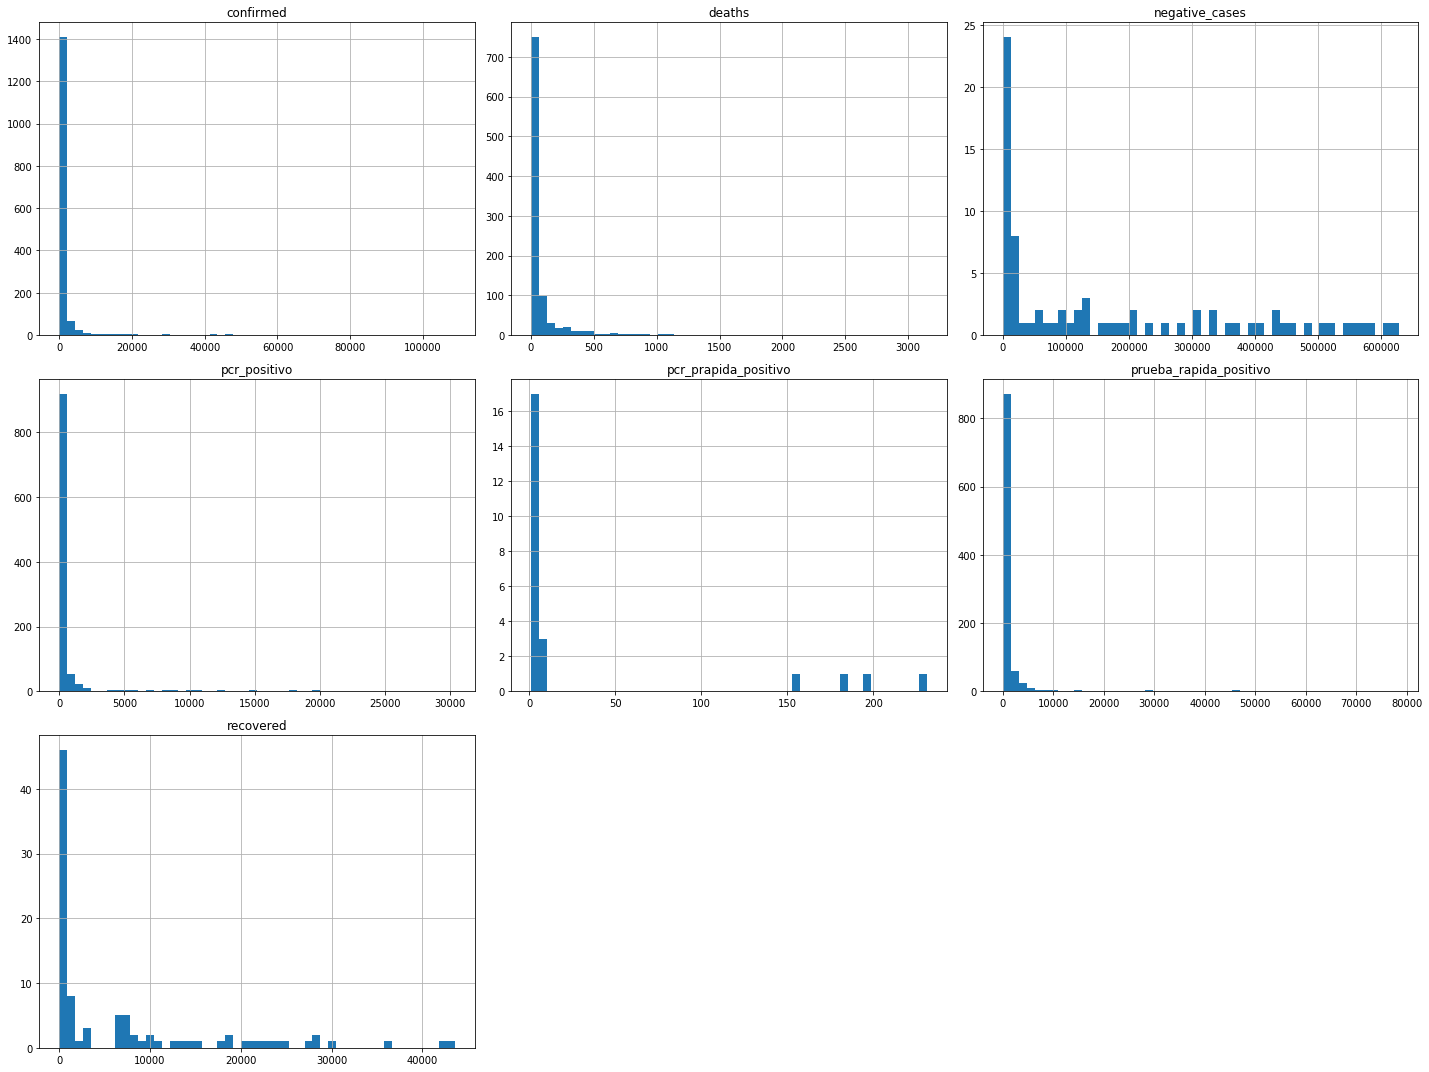

In [6]:
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Discover and visualize the data to gain insights
* It's necessary to work on data elements that is not usefull for us (The NaN values).
* But first we need to separate the data in regions of interest.

Because we need to visualize data but in a linear way!

### Solution
Using dictionaries!

In [7]:
regions = {df["region"][ind]: True for ind in df.index}
print(str(regions))

{nan: True, 'Arequipa': True, 'Cusco': True, 'Huánuco': True, 'Ica': True, 'Lima': True, 'Ancash': True, 'Callao': True, 'La Libertad': True, 'Lambayeque': True, 'Piura': True, 'Loreto': True, 'Madre de Dios': True, 'Junín': True, 'San Martín': True, 'Tumbes': True, 'Cajamarca': True, 'Pasco': True, 'Ayacucho': True, 'Tacna': True, 'Huancavelica': True, 'Apurimac': True, 'Moquegua': True, 'Puno': True, 'Amazonas': True, 'Ucayali': True}


In [8]:
regions_COVID = {key:pd.DataFrame(columns = df.columns) for key, val in regions.items()}
for ind in df.index:
    regions_COVID[df["region"][ind]] = regions_COVID[df["region"][ind]].append(df.iloc[ind], ignore_index = True)
print(regions_COVID["Arequipa"].head())

  country iso3c    region        date confirmed  deaths  recovered  \
0    Peru   PER  Arequipa  2020-03-13         2     NaN        NaN   
1    Peru   PER  Arequipa  2020-03-14         2     NaN        NaN   
2    Peru   PER  Arequipa  2020-03-15         2     NaN        NaN   
3    Peru   PER  Arequipa  2020-03-16         2     NaN        NaN   
4    Peru   PER  Arequipa  2020-03-17         2     NaN        NaN   

   negative_cases  pcr_positivo  prueba_rapida_positivo  pcr_prapida_positivo  
0             NaN           NaN                     NaN                   NaN  
1             NaN           NaN                     NaN                   NaN  
2             NaN           NaN                     NaN                   NaN  
3             NaN           NaN                     NaN                   NaN  
4             NaN           NaN                     NaN                   NaN  


Now fix NaN to Peru

In [9]:
for key,val in regions_COVID.items():
    print(key, end = ", ")

nan, Arequipa, Cusco, Huánuco, Ica, Lima, Ancash, Callao, La Libertad, Lambayeque, Piura, Loreto, Madre de Dios, Junín, San Martín, Tumbes, Cajamarca, Pasco, Ayacucho, Tacna, Huancavelica, Apurimac, Moquegua, Puno, Amazonas, Ucayali, 

In [10]:
regions_COVID_fix1 = {}
it = 0
for key, val in regions_COVID.items():
    if it == 0:
        regions_COVID_fix1["Peru"] = val
    else:
        regions_COVID_fix1[key] = val
    it += 1
for key, val in regions_COVID_fix1.items():
    print(key, end = ", ")

Peru, Arequipa, Cusco, Huánuco, Ica, Lima, Ancash, Callao, La Libertad, Lambayeque, Piura, Loreto, Madre de Dios, Junín, San Martín, Tumbes, Cajamarca, Pasco, Ayacucho, Tacna, Huancavelica, Apurimac, Moquegua, Puno, Amazonas, Ucayali, 

Now fix the other NaN Values

In [11]:
NaNvalue = regions_COVID_fix1["Peru"]["region"][0]

In [12]:
regions_COVID_fix2 = {}
for key, val in regions_COVID_fix1.items():
    regions_COVID_fix2[key] = regions_COVID_fix1[key].replace(to_replace = NaNvalue, value = 0)
print(regions_COVID_fix2["Arequipa"].head()) 

  country iso3c    region        date confirmed  deaths  recovered  \
0    Peru   PER  Arequipa  2020-03-13         2     0.0        0.0   
1    Peru   PER  Arequipa  2020-03-14         2     0.0        0.0   
2    Peru   PER  Arequipa  2020-03-15         2     0.0        0.0   
3    Peru   PER  Arequipa  2020-03-16         2     0.0        0.0   
4    Peru   PER  Arequipa  2020-03-17         2     0.0        0.0   

   negative_cases  pcr_positivo  prueba_rapida_positivo  pcr_prapida_positivo  
0             0.0           0.0                     0.0                   0.0  
1             0.0           0.0                     0.0                   0.0  
2             0.0           0.0                     0.0                   0.0  
3             0.0           0.0                     0.0                   0.0  
4             0.0           0.0                     0.0                   0.0  



Now replace the dates by numbers.

In [13]:
#save the start date of infection in each region
regions_COVID_StrDate = {key: regions_COVID_fix2[key]["date"][0] for key, val in regions_COVID_fix2.items()}

#replacing the date values
regions_COVID_fixed = {}
for key, val in regions_COVID_fix2.items():
    regions_COVID_fixed[key] = pd.DataFrame(columns = regions_COVID_fix2["Peru"].columns)
    for ind in val.index:
        row = val.iloc[ind]
        date = row["date"]
        regions_COVID_fixed[key] = regions_COVID_fixed[key].append(row.replace(to_replace = date, value = ind + 1))
print(regions_COVID_fixed["Arequipa"].head())

  country iso3c    region date confirmed  deaths  recovered  negative_cases  \
0    Peru   PER  Arequipa    1         2     0.0        0.0             0.0   
1    Peru   PER  Arequipa    2         2     0.0        0.0             0.0   
2    Peru   PER  Arequipa    3         2     0.0        0.0             0.0   
3    Peru   PER  Arequipa    4         2     0.0        0.0             0.0   
4    Peru   PER  Arequipa    5         2     0.0        0.0             0.0   

   pcr_positivo  prueba_rapida_positivo  pcr_prapida_positivo  
0           0.0                     0.0                   0.0  
1           0.0                     0.0                   0.0  
2           0.0                     0.0                   0.0  
3           0.0                     0.0                   0.0  
4           0.0                     0.0                   0.0  


Now data is ready to be plot!

In [14]:
def plot_region_confirmed(region_df, region_name):
    inds = [ind + 1 for ind in region_df.index]
    confirmed = region_df["confirmed"]
    clear_plt_cache()
    plt.plot(inds, confirmed)
    save_fig(region_name)
    plt.show()
    
def plot_region_death(region_df, region_name):
    inds = [ind + 1 for ind in region_df.index]
    death = region_df["deaths"]
    clear_plt_cache()
    plt.plot(inds, death)
    save_fig(region_name)
    plt.show()
    
def plot_region_stats(region_df, region_name):
    inds = [ind + 1 for ind in region_df.index]
    confirmed = region_df["confirmed"]
    death = region_df["deaths"]
    clear_plt_cache()
    plt.plot(inds, confirmed, color = "blue", label = "Casos Confirmados")
    plt.plot(inds, death, color = "red", label = "Fallecidos")
    plt.legend(loc = "upper left")
    save_fig(region_name)
    plt.show()

Saving figure Arequipa_Stats


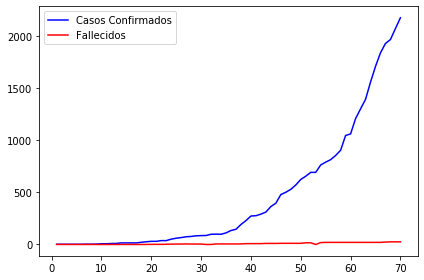

Saving figure Arequipa_deaths


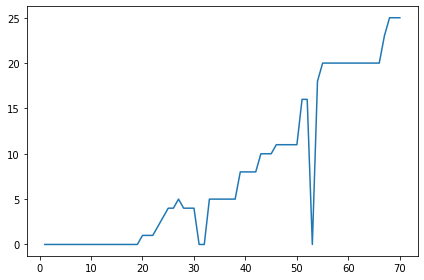

In [15]:
plot_region_stats(regions_COVID_fixed["Arequipa"], "Arequipa_Stats")
plot_region_death(regions_COVID_fixed["Arequipa"], "Arequipa_deaths")

plot_region_stats(regions_COVID_fixed["Peru"], "Peru_Stats")
plot_region_death(regions_COVID_fixed["Peru"], "Peru_deaths")

# Prepare the data for Machine Learning algorithms

* Analizing dataframes we have note that important fields are "date", "pcr_positivo", "prueba_rapida_positivo" and "pcr_prapida_positivo".
* Note that the date is an independant field (it can be alone to predict the data) so we analize in both ways.
* The $Y$ values are "confirmed" and "deaths" both with different functions to represent each. So we are going to predict individually.

## Preparing both datasets (date, other)

In [16]:
def separate_region(region_dictionary, region_name):
    try:
        return region_dictionary[region_name]
    except:
        print("Error: Wrong name in region_name")
        return False

def fields_by_thetas(date = False):
    if date:
        return ["date", "confirmed", "deaths"]
    else:
        return ["pcr_positivo", "prueba_rapida_positivo", "pcr_prapida_positivo", "pcr_prapida_positivo", "confirmed", "deaths"]
    
def separate_fields(dataframe, fields):
    important_df = dataframe[fields]
    return important_df

def auto_separator(region_dictionary, region_name, date = False):
    region_dataset = separate_region(region_dictionary, region_name)
    fields = fields_by_thetas(date)
    important_info = separate_fields(region_dataset, fields)
    return important_info

In [17]:
aqp_dataset = auto_separator(regions_COVID_fixed, "Arequipa")
aqp_dataset_date = auto_separator(regions_COVID_fixed, "Arequipa", date = True)
peru_dataset = auto_separator(regions_COVID_fixed, "Peru")
peru_dataset_date = auto_separator(regions_COVID_fixed, "Peru", date = True)

__Note:__ Exist Noise between data rows, to fixed we use *fix_np_array* function

In [18]:
def fix_np_array(np_array):
    row, col = np_array.shape
    for i in range(1, row):
        for j in range(0, col):
            if np_array[i][j] == 0:
                np_array[i][j] = np_array[i - 1][j]
    return np_array

In [19]:
def dataframe_to_fixed_np(df):
    data = df.to_numpy()
    data = fix_np_array(data)
    data = data.T
    temp = np.ones(data.shape[1])
    temp2 = [temp]
    for i in data:
        temp2.append(i)
    temp3 = np.array(temp2)
    X_data = temp3[0:-2]
    Y_data = temp3[-2:]
    temp4 = []
    for i in X_data:
        temp4.append(i)
    temp5 = cp.copy(temp4)
    temp4.append(Y_data[0])
    temp5.append(Y_data[1])
    confirmed, deaths = np.array(temp4), np.array(temp5)
    return confirmed, deaths

In [20]:
aqp_confirmed, aqp_deaths = dataframe_to_fixed_np(aqp_dataset)
aqp_conf_date, aqp_deaths_date = dataframe_to_fixed_np(aqp_dataset_date)
peru_confirmed, peru_deaths = dataframe_to_fixed_np(peru_dataset)
peru_conf_date, peru_deaths_date = dataframe_to_fixed_np(peru_dataset_date)

Now separate to train and test...

In [21]:
def train_test_separator(np_array):
    max_len = np_array.shape[1]
    train_end, test_start = int(max_len*0.7), int(max_len*0.7)
    return np_array[:,:train_end], np_array[:,test_start:]

In [22]:
aqp_c_train, aqp_c_test = train_test_separator(aqp_confirmed)
aqp_d_train, aqp_d_test = train_test_separator(aqp_deaths)
aqp_cd_train, aqp_cd_test = train_test_separator(aqp_conf_date)
aqp_dd_train, aqp_dd_test = train_test_separator(aqp_deaths_date)
peru_c_train, peru_c_test = train_test_separator(peru_confirmed)
peru_d_train, peru_d_test = train_test_separator(peru_deaths)
peru_cd_train, peru_cd_test = train_test_separator(peru_conf_date)
peru_dd_train, peru_dd_test = train_test_separator(peru_deaths_date)

## Other functions that could help

In [23]:
def data_to_XY(np_array):
    return np_array[:-1], np.array([np_array[-1]])

def init_thetas(X):
    theta = np.zeros((X.shape[0], 1))
    return theta

Now the data is ready for the ML algorithms!

# Select and train a model

We can train in two ways: with date an with the other data so the applied gradient would be:

In [24]:
def Gradient_no_date(X, theta, Y):
    return np.sum((np.dot(theta.T, X) - Y)*X, keepdims = True, axis = 1) / Y.shape[1]

def Gradient_with_date(X, theta, Y):
    #we know X has dimensions of [2,m] then it only have 2 gradients
    m = Y.shape[1]
    G1 = np.sum((theta[0] * X[0] + theta[1] * np.power(X[1], 2) - Y) * X) / m
    G2 = np.sum((theta[0] * X[0] + theta[1] * np.power(X[1], 2) - Y) * np.power(X, 2)) / m
    return np.array([[G1], [G2]])

In [25]:
def Gradient_descent(X, theta, Y, learning_rate = 0.00019, iterations = 1000, date = False):
    for i in range(iterations):
        if date:
            theta = theta - learning_rate * Gradient_with_date(X, theta, Y)
        else:
            theta = theta - learning_rate * Gradient_no_date(X, theta, Y)
    return theta

## Initializing values

In [26]:
X_train, Y_train = data_to_XY(aqp_c_train)
X_test, Y_test = data_to_XY(aqp_c_test)
theta_nd = init_thetas(X_train)
X_train_d, Y_train_d = data_to_XY(aqp_cd_train)
X_test_d, Y_test_d = data_to_XY(aqp_cd_test)
theta_wd = init_thetas(X_train_d)

## Applying Gradient Descent

In [27]:
theta_nd = Gradient_descent(X_train, theta_nd, Y_train)
# Start with little learning rate because the exponential
theta_wd = Gradient_descent(X_train_d, theta_wd, Y_train_d, learning_rate = 0.00000001, date = True)

/home/reiki/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/reiki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


## Prediction function

In [28]:
def predict_function(X, theta, date = False):
    if date:
        return theta[0] * X[0] + theta[1] * np.power(X[1], 2)
    else:
        return np.dot(theta.T, X)

## Cost Function

In [29]:
def cost_function(X, theta, Y, date = False):
    if date:
        return np.sum(theta[0] * X[0] + theta[1]* np.power(X[1], 2) - Y) ** 2 / (Y.shape[1] * 2)
    else:
        return np.sum((np.dot(theta.T, X) - Y) ** 2) / (Y.shape[1] * 2)

## Calculating prediction and cost on test 

In [30]:
Y_predict_nd = predict_function(X_test, theta_nd)
Y_predict_wd = predict_function(X_test_d, theta_wd, date = True)
print("Costo sin date: " + str(cost_function(X_test, theta_nd, Y_test)))
print("Costo con date: " + str(cost_function(X_test_d, theta_wd, Y_test_d, date = True)))

Costo sin date: nan
Costo con date: 3972996.7390476926


* Looks date prediction is not doing well, Let's try other hyperparameters

In [31]:
theta_wd = init_thetas(X_train_d)
theta_wd = Gradient_descent(X_train_d, theta_wd, Y_train_d, learning_rate = 0.0000001, iterations = 10000, date = True)
print("Costo con date: " + str(cost_function(X_test_d, theta_wd, Y_test_d, date = True)))
theta_wd

Costo con date: 3966486.3620464276


array([[-0.33856222],
       [ 0.17214929]])

No case, __Conclusion:__ Linear Regresion will be used for this prediction

# Fine-Tune your model
* Let's see how is predicting our model

Saving figure Arequipa_confirmed_case_prediction
[[50 nan]
 [51 nan]
 [52 nan]
 [53 nan]
 [54 nan]
 [55 nan]
 [56 nan]
 [57 nan]
 [58 nan]
 [59 nan]
 [60 nan]
 [61 nan]
 [62 nan]
 [63 nan]
 [64 nan]
 [65 nan]
 [66 nan]
 [67 nan]
 [68 nan]
 [69 nan]
 [70 nan]]


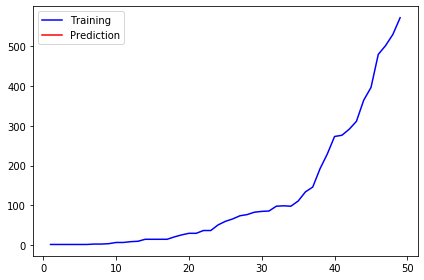

In [32]:
clear_plt_cache()
plt.plot(X_train_d[1], Y_train[0], color = "blue", label = "Training")
plt.plot(X_test_d[1], Y_predict_nd[0], color = "red", label = "Prediction")
plt.legend(loc = "upper left")
save_fig("Arequipa_confirmed_case_prediction")
print(np.array([X_test_d[1], Y_predict_nd[0]]).T)
plt.show()

It can be improved even more

In [33]:
def auto_ploter(Y_train, Y_predict_nd):
    arange1 = np.arange(Y_train.shape[1])
    arange2 = np.arange(Y_train.shape[1], Y_train.shape[1] + Y_predict_nd.shape[1])
    clear_plt_cache()
    plt.plot(arange1, Y_train[0], color = "blue", label = "Training")
    plt.plot(arange2, Y_predict_nd[0], color = "red", label = "Prediction")
    plt.legend(loc = "upper left")
    save_fig("region_prediction")
    print("train:\n", np.array([arange1, Y_train]).T, sep="")
    print("test:\n", str(np.array([arange2, Y_predict_nd]).T), sep = "")
    plt.show()

Saving figure region_prediction
train:
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
 array([[2, 2, 2, 2, 2, 2, 3, 3, 4, 7, 7, 9, 10, 15, 15, 15, 15, 21, 26,
        30, 30, 37, 37, 51, 60, 66, 74, 77, 83, 85, 86, 98, 99, 98, 111,
        134, 146, 192, 229, 273, 276, 291, 311, 364, 396, 479, 501, 529,
        571]], dtype=object)]
test:
[array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69])
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan]], dtype=object)]


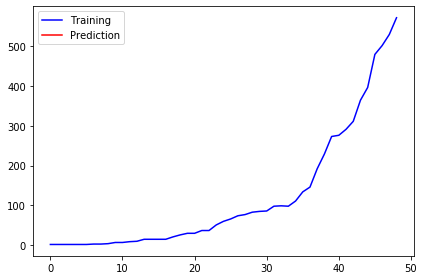

In [34]:
auto_ploter(Y_train, Y_predict_nd)

## Doing it with any region

In [35]:
region_dataset = auto_separator(regions_COVID_fixed, "Lima") # change Lima for other region
region_confirmed, region_deaths = dataframe_to_fixed_np(region_dataset)

theta: [[0.003656233733396903]
 [1.0143661940330486]
 [0.9862905966102631]
 [0.06254809434456704]
 [0.06254809434456704]]
Costo: 37694.14299029325
Saving figure region_prediction
train:
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
 array([[32, 37, 58, 70, 96, 111, 194, 212, 241, 278, 307, 322, 369, 453,
        494, 518, 639, 718, 799, 990, 1059, 1179, 1257, 1639, 1837, 2100,
        3016, 3704, 4210, 4933, 5456, 7458, 7476, 8412, 9107, 9793,
        10234, 10877, 11297, 12256, 13214, 14300, 14814, 16567, 17884,
        18571, 20048, 21854, 23561]], dtype=object)]
test:
[array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69])
 array([[25691.95078631703, 26878.439068708034, 28942.452515481567,
        28942.452515481567, 32265.58570008921, 35203.00232400358,
        37498.1

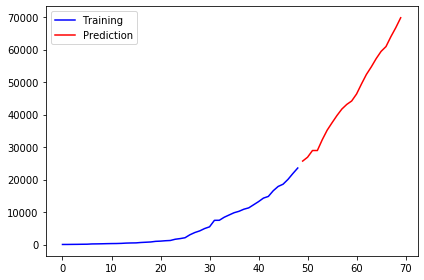

In [36]:
region_train, region_test = train_test_separator(region_confirmed)
X_train, Y_train = data_to_XY(region_train)
X_test, Y_test = data_to_XY(region_test)
theta = init_thetas(X_train)
theta = Gradient_descent(X_train, theta, Y_train, learning_rate = 0.00000001)
Y_predict = predict_function(X_test, theta)
print("theta: " + str(theta))
print("Costo: " + str(cost_function(X_test, theta, Y_test)))
auto_ploter(Y_train, Y_predict)

theta: [[7.787536255903562e-05]
 [0.017796571517592046]
 [0.01788435155333461]
 [-0.0034023094308188472]
 [-0.0034023094308188472]]
Costo: 5179.485105668284
Saving figure region_prediction
train:
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
 array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0,
        6.0, 7.0, 9.0, 10.0, 13.0, 16.0, 28.0, 34.0, 39.0, 46.0, 51.0,
        58.0, 65.0, 72.0, 82.0, 87.0, 94.0, 94.0, 94.0, 114.0, 117.0,
        129.0, 129.0, 144.0, 169.0, 199.0, 227.0, 247.0, 267.0, 290.0,
        303.0, 303.0, 332.0, 358.0, 404.0, 437.0]], dtype=object)]
test:
[array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69])
 array([[457.65905676525676, 478.9014074174263, 516.1036220580297,
        516.1036220580297, 575.9356404646271, 628.817054059

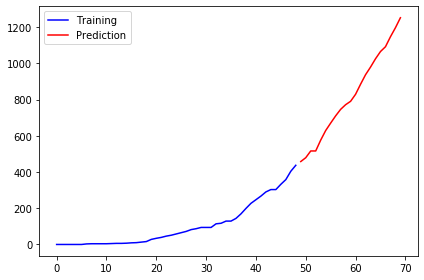

In [37]:
region_train, region_test = train_test_separator(region_deaths)
X_train, Y_train = data_to_XY(region_train)
X_test, Y_test = data_to_XY(region_test)
theta = init_thetas(X_train)
theta = Gradient_descent(X_train, theta, Y_train, learning_rate = 0.00000001)
Y_predict = predict_function(X_test, theta)
print("theta: " + str(theta))
print("Costo: " + str(cost_function(X_test, theta, Y_test)))
auto_ploter(Y_train, Y_predict)

# Other aproaches

* Predict confirmed/death with death/confirmed.

In [38]:
def new_auto_separator(region_dictionary, region_name):
    region_dataset = separate_region(region_dictionary, region_name)
    fields = ["confirmed", "deaths"]
    fields2 = ["deaths", "confirmed"]
    deaths_ds = separate_fields(region_dataset, fields)
    confirmed_ds = separate_fields(region_dataset, fields2)
    return deaths_ds, confirmed_ds

def new_dataframe_to_fixed_np(df):
    data = df.to_numpy()
    data = fix_np_array(data)
    data = data.T
    return data

## Initializing values

In [39]:
deaths_ds, confirmed_ds = new_auto_separator(regions_COVID_fixed, "Lima") # change Lima for other region
deaths_ds = new_dataframe_to_fixed_np(deaths_ds)
confirmed_ds = new_dataframe_to_fixed_np(confirmed_ds)

## Confirmed prediction

theta: [[55.75848864251807]]
Costo: 17583767.82263561
Saving figure region_prediction
train:
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
 array([[32, 37, 58, 70, 96, 111, 194, 212, 241, 278, 307, 322, 369, 453,
        494, 518, 639, 718, 799, 990, 1059, 1179, 1257, 1639, 1837, 2100,
        3016, 3704, 4210, 4933, 5456, 7458, 7476, 8412, 9107, 9793,
        10234, 10877, 11297, 12256, 13214, 14300, 14814, 16567, 17884,
        18571, 20048, 21854, 23561]], dtype=object)]
test:
[array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69])
 array([[27377.417923476372, 28102.278275829107, 28827.13862818184,
        28827.13862818184, 32562.957367230552, 34179.95353786358,
        35462.398776641494, 36410.2930835643, 36912.11948134696,
        37469.70436777214, 38417.5986746949

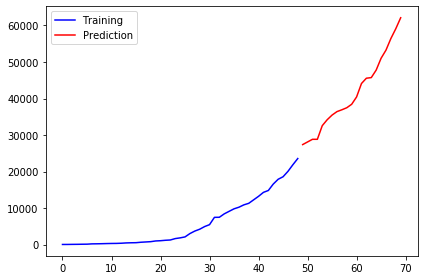

In [40]:
region_train, region_test = train_test_separator(confirmed_ds)
X_train, Y_train = data_to_XY(region_train)
X_test, Y_test = data_to_XY(region_test)
theta = init_thetas(X_train)
theta = Gradient_descent(X_train, theta, Y_train, learning_rate = 0.00001)
Y_predict = predict_function(X_test, theta)
print("theta: " + str(theta))
print("Costo: " + str(cost_function(X_test, theta, Y_test)))
auto_ploter(Y_train, Y_predict)

## Deaths prediction

theta: [[0.01773516636170337]]
Costo: 4761.826955124841
Saving figure region_prediction
train:
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
 array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0,
        6.0, 7.0, 9.0, 10.0, 13.0, 16.0, 28.0, 34.0, 39.0, 46.0, 51.0,
        58.0, 65.0, 72.0, 82.0, 87.0, 94.0, 94.0, 94.0, 114.0, 117.0,
        129.0, 129.0, 144.0, 169.0, 199.0, 227.0, 247.0, 267.0, 290.0,
        303.0, 303.0, 332.0, 358.0, 404.0, 437.0]], dtype=object)]
test:
[array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69])
 array([[456.11300849028726, 477.21785646071424, 514.1424728257807,
        529.252834565952, 573.5375449711253, 626.0336374017672,
        666.9486661982169, 706.5158223511771, 742.1103012391158,
        767.6489407999686, 786

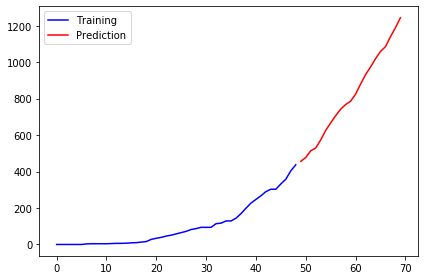

In [41]:
region_train, region_test = train_test_separator(deaths_ds)
X_train, Y_train = data_to_XY(region_train)
X_test, Y_test = data_to_XY(region_test)
theta = init_thetas(X_train)
theta = Gradient_descent(X_train, theta, Y_train, learning_rate = 0.00000001)
Y_predict = predict_function(X_test, theta)
print("theta: " + str(theta))
print("Costo: " + str(cost_function(X_test, theta, Y_test)))
auto_ploter(Y_train, Y_predict)